<a href="https://www.kaggle.com/code/rubanzasilva/fastai-for-ps-s03e05?scriptVersionId=118997366" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Dataset description

Goal is to predict the quality of wine
The Score between 0 and 10

imports

In [1]:
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!ls /kaggle/input/playground-series-s3e5

sample_submission.csv  test.csv  train.csv


Define dataframe

In [3]:
path = Path('/kaggle/input/playground-series-s3e5')
path

Path('/kaggle/input/playground-series-s3e5')

In [4]:
train_df = pd.read_csv(path/'train.csv', index_col='Id')
test_df = pd.read_csv(path/'test.csv', index_col = 'Id')
sample_df = pd.read_csv(path/'sample_submission.csv', index_col = 'Id')

In [5]:
train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8


In [6]:
train_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

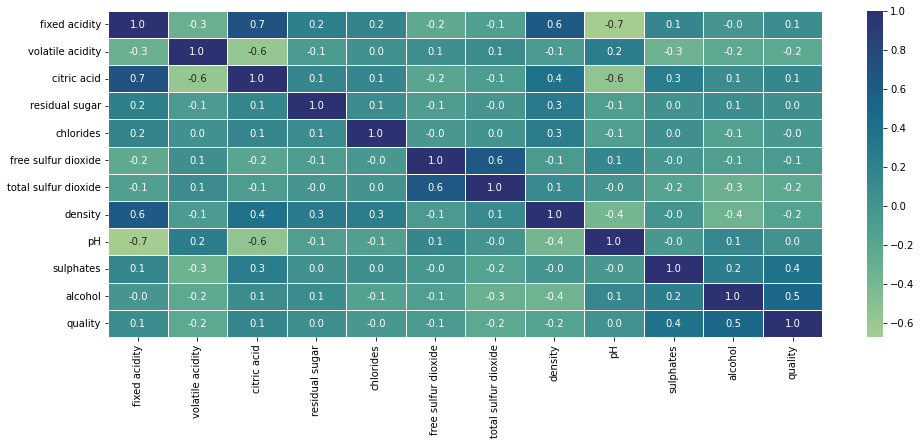

In [7]:
#correlation matrix with heatmap

#set plot size, must be in same cell as train_Corr
plt.figure(figsize=(16,6))
train_corr = sns.heatmap(train_df.corr(), annot=True, fmt=".1f", linewidth=.7, cmap="crest")


**Builing data loaders**

In [8]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names="quality",
    cat_names = None, 
    cont_names = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
    y_block = CategoryBlock(),                              
    procs = [Normalize])

In [9]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [10]:
to = TabularPandas(train_df, procs=[Normalize],
                   cat_names = None,
    cont_names = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',],
                   y_names='quality',
                   y_block = CategoryBlock(),
                   splits=splits)

In [11]:
to.xs.iloc[:2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
1965,0.607900,-0.551765,0.341421,-0.812977,-0.543989,0.226683,0.526380,0.321082,0.134131,-0.157038,-0.893285
1542,0.137259,0.308532,-0.348942,-0.230052,0.419038,0.428029,2.125309,0.254968,-1.131926,-1.114901,-1.379726


In [12]:
dls = to.dataloaders(bs=32)

In [13]:
dls.show_batch()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.580,0.02,6.60,0.082,6.000000,14.0,0.99480,3.36,0.58,12.5,7
1,8.4,0.745,0.12,2.10,0.092,16.000000,86.0,0.99680,3.09,0.67,9.5,5
2,7.7,1.180,0.21,2.00,0.082,7.000000,35.0,0.99720,3.27,0.48,9.7,5
3,6.8,0.610,0.01,2.80,0.074,13.000000,31.0,0.99538,3.34,0.54,12.7,7
4,8.0,0.300,0.41,2.30,0.098,4.000001,9.0,0.99444,3.30,0.66,11.7,5
5,7.7,0.430,0.46,1.80,0.064,7.000000,20.0,0.99520,3.25,0.86,13.6,8
6,11.6,0.390,0.66,2.90,0.094,6.000000,23.0,0.99940,3.09,0.74,11.8,6
7,6.4,0.655,0.07,1.70,0.054,12.000000,18.0,0.99467,3.16,0.67,12.8,6
8,8.9,0.280,0.34,6.55,0.056,12.000000,19.0,0.99536,3.21,0.78,12.3,7
9,8.2,0.490,0.30,1.70,0.092,10.000000,21.0,0.99720,3.00,1.18,9.4,5


In [14]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.001737800776027143)

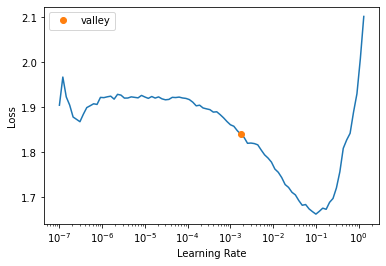

In [15]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(30,1e-3, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,1.821810,1.724831,0.321168,00:00
1,1.671112,1.561152,0.459854,00:00
2,1.537616,1.437401,0.542579,00:00
3,1.427667,1.387695,0.552311,00:00
4,1.357934,1.335573,0.545012,00:00
5,1.287964,1.227291,0.583942,00:00
6,1.206672,1.184365,0.566910,00:00
7,1.130598,1.116097,0.581509,00:00
8,1.058772,1.087430,0.598540,00:00
9,1.019281,1.060637,0.588808,00:00


In [17]:
learn.show_results()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_pred
0,-0.451043,0.079120,-0.030313,3.150915,0.209684,0.629375,2.879521,0.475383,0.415477,-0.746492,-0.990574,2.0,2.0
1,-0.627534,-0.551765,-0.136523,-0.463222,1.340194,-1.384086,-1.042380,-0.141787,-0.287888,-0.746492,-0.893285,2.0,2.0
2,-0.392213,-0.264999,-0.295838,-0.346637,-0.334635,1.736778,1.491771,-0.075672,1.470526,0.506098,-0.893285,2.0,2.0
3,-0.215723,-1.182650,-0.083418,-0.230052,0.293426,1.233413,0.526380,-0.097711,-1.272599,-1.483310,0.176883,4.0,2.0
4,0.725561,1.971775,-0.136523,-0.113467,-0.167152,-1.082067,-0.529516,-0.097711,-0.428561,-1.041219,-0.698710,2.0,2.0
5,-0.274553,1.771038,0.129001,-0.579807,0.419038,-0.075337,0.405706,-0.075672,0.063795,-0.157038,-1.185150,2.0,2.0
6,0.960881,0.136473,-0.508257,1.168969,-0.376506,-0.679375,-0.740696,0.805990,-0.991253,-0.820174,-0.893285,2.0,2.0
7,0.196089,-0.322353,1.191098,0.586044,0.419038,-0.075337,1.914130,1.357013,-1.624283,-0.157038,-0.893285,2.0,2.0
8,-0.039232,-0.551765,0.235211,0.236288,0.167814,0.730048,0.526380,-0.240976,1.118844,-0.157038,-0.698710,2.0,2.0


In [18]:
dl = learn.dls.test_dl(test_df)

In [19]:
preds = learn.get_preds(dl=dl)
preds

(tensor([[1.7002e-03, 2.7634e-02, 3.7279e-01, 5.9249e-01, 3.9736e-03, 1.4052e-03],
         [1.0312e-02, 9.8054e-03, 2.4998e-01, 5.7205e-01, 1.4794e-01, 9.9088e-03],
         [2.4708e-03, 2.7264e-02, 3.1928e-01, 6.4219e-01, 5.3377e-03, 3.4629e-03],
         ...,
         [7.2380e-04, 2.1500e-02, 7.8052e-01, 1.7203e-01, 2.4720e-02, 5.0959e-04],
         [6.5341e-03, 6.8770e-03, 8.6068e-01, 9.6607e-02, 2.4061e-02, 5.2385e-03],
         [5.3314e-03, 1.1565e-02, 3.9112e-01, 4.9237e-01, 9.5005e-02, 4.6062e-03]]),
 None)

Submit to kaggle

In [20]:
target_preds = preds[0]

In [21]:
target_preds = preds[0][:,1]
test_df['quality'] = target_preds
     

In [22]:
test_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8,0.027634
2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0,0.009805
2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5,0.027264
2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7,0.001697
2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8,0.001695
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,8.8,0.745,0.18,2.7,0.084,41.0,115.0,0.99823,3.38,0.70,9.8,0.000702
3424,15.6,0.240,0.55,2.9,0.062,11.0,25.0,0.99724,2.99,0.77,10.1,0.321306
3425,7.3,0.760,0.00,2.2,0.095,6.0,19.0,0.99880,3.67,0.60,9.4,0.021500


In [23]:
test_df.to_csv('submission.csv', columns=['quality'], index=True)

In [24]:
submission = pd.read_csv('submission.csv')
submission.head()

,Id,quality
0,2056,0.027634
1,2057,0.009805
2,2058,0.027264
3,2059,0.001697
4,2060,0.001695


The current results being produced by the model are floats while the expeected output is int32 
I figure fastai must be treating this as a regression problem as opposed to classification
Specified CategoryBlock with no change in result

I rounded of below just to be able to make a submission but am still on the lookout for a more effective solution and any contributions will be welcome.

I later realise i hadnt been declaring y-block as category block in the TabularPandas object, , had only decalared it above dataloader

In [25]:
#submission_y.dtypes

In [26]:
#our goal is to convert quality that is float64 to int32
#submission_y['quality'] = submission_y['quality'].astype(int)
#submission_y.dtypes

In [27]:
#submission_y.head()

In [28]:
!ls .

__notebook__.ipynb  models  submission.csv


In [29]:
#import os  
#os.makedirs('.', exist_ok=True)  
#submission_y.to_csv('submission.csv', index=False)  

In [30]:
#submission = pd.read_csv('submission.csv')
#submission